<a href="https://colab.research.google.com/github/NicolasPCS/Image-Classification/blob/main/CNN_Own.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.__version__

'2.12.0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
training_generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range=7,
                                        horizontal_flip=True,
                                        zoom_range=0.2)

In [ ]:
train_dataset = training_generator.flow_from_directory('/content/drive/MyDrive/Tesis/Images/training_set',
                                                       target_size=(64,64),
                                                       batch_size=32,
                                                       class_mode='categorical',
                                                       shuffle=True)

Found 4201 images belonging to 8 classes.


In [ ]:
train_dataset.classes

array([0, 0, 0, ..., 7, 7, 7], dtype=int32)

In [ ]:
train_dataset.class_indices

{'billete100_new': 0,
 'billete100_old': 1,
 'billete10_new': 2,
 'billete10_old': 3,
 'billete20_new': 4,
 'billete20_old': 5,
 'billete50_new': 6,
 'billete50_old': 7}

In [ ]:
val_generator = ImageDataGenerator(rescale=1./255)
val_dataset = val_generator.flow_from_directory('/content/drive/MyDrive/Tesis/Images/validation_set',
                                                  target_size=(64, 64),
                                                  batch_size=8,
                                                  class_mode='categorical',
                                                  shuffle=False)

Found 208 images belonging to 8 classes.


In [ ]:
network = Sequential()
network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(units=577, activation='relu'))
network.add(Dense(units=577, activation='relu'))
network.add(Dense(units=8, activation='softmax'))
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

In [ ]:
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = network.fit(train_dataset, epochs=30)

Epoch 1/30
132/132 [==============================] - 925s 7s/step - loss: 1.5724 - accuracy: 0.4232
Epoch 2/30
132/132 [==============================] - 29s 222ms/step - loss: 0.9937 - accuracy: 0.6251
Epoch 3/30
132/132 [==============================] - 30s 231ms/step - loss: 0.7693 - accuracy: 0.7101
Epoch 4/30
132/132 [==============================] - 29s 221ms/step - loss: 0.6612 - accuracy: 0.7565
Epoch 5/30
132/132 [==============================] - 29s 219ms/step - loss: 0.5006 - accuracy: 0.8165
Epoch 6/30
132/132 [==============================] - 29s 221ms/step - loss: 0.4198 - accuracy: 0.8419
Epoch 7/30
132/132 [==============================] - 30s 225ms/step - loss: 0.3652 - accuracy: 0.8619
Epoch 8/30
132/132 [==============================] - 29s 218ms/step - loss: 0.3028 - accuracy: 0.8853
Epoch 9/30
132/132 [==============================] - 29s 222ms/step - loss: 0.2414 - accuracy: 0.9105
Epoch 10/30
132/132 [==============================] - 29s 220ms/step - los

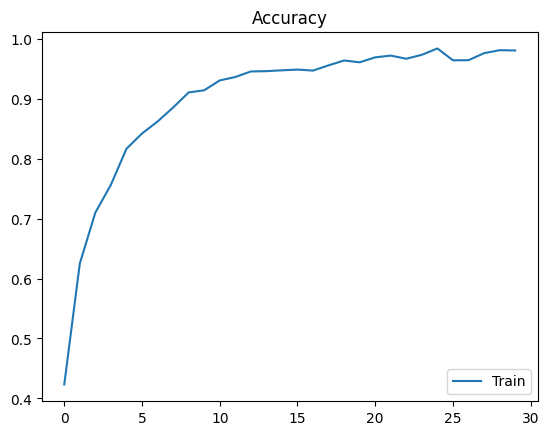

In [ ]:
acc_train_curve = history.history["accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

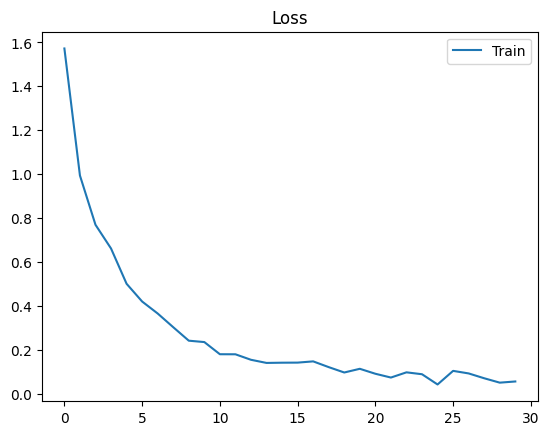

In [ ]:
loss_train_curve = history.history["loss"]
plt.plot(loss_train_curve, label = "Train")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

In [ ]:
val_dataset.class_indices

{'billete100_new': 0,
 'billete100_old': 1,
 'billete10_new': 2,
 'billete10_old': 3,
 'billete20_new': 4,
 'billete20_old': 5,
 'billete50_new': 6,
 'billete50_old': 7}

In [ ]:
predictions = network.predict(val_dataset)
predictions
# [Bart, Homer]

26/26 [==============================] - 50s 2s/step


array([[5.20186484e-01, 4.31378186e-01, 1.02606954e-07, ...,
        6.02976280e-11, 9.90846544e-04, 1.92094361e-03],
       [1.11914217e-01, 8.88085783e-01, 1.81377723e-14, ...,
        3.62138448e-17, 1.03389599e-08, 1.50647911e-10],
       [2.15868605e-03, 9.91994262e-01, 5.45206413e-09, ...,
        3.73968669e-11, 3.16671176e-05, 1.10155252e-05],
       ...,
       [8.64083813e-06, 2.72867928e-09, 1.81313453e-06, ...,
        2.32572850e-09, 1.26296004e-06, 4.65204095e-04],
       [3.78630466e-06, 2.49786751e-07, 2.80769837e-06, ...,
        3.43287319e-08, 1.59753705e-04, 7.61042000e-04],
       [1.17815114e-06, 7.47989848e-09, 2.30636346e-07, ...,
        6.23145313e-09, 2.47920489e-05, 2.66908697e-04]], dtype=float32)

In [ ]:
predictions = np.argmax(predictions, axis = 1)
predictions

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 7, 1, 1, 1, 1, 1, 7, 1, 1, 3, 1, 4, 1, 1, 3, 1, 2, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 4, 7, 4, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4,
       4, 3, 4, 4, 3, 4, 4, 4, 4, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       7, 4, 4, 4, 7, 7, 7, 7, 7, 7, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 7, 4, 4, 4, 4, 4, 4, 4, 7, 7, 4,
       4, 4, 4, 7, 4, 4, 4, 4, 4, 4])

In [ ]:
val_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7], dtype=int32)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(val_dataset.classes, predictions)

0.6346153846153846

<Axes: >

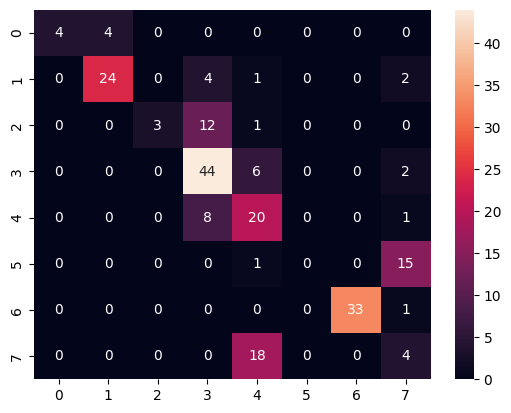

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(val_dataset.classes, predictions)
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(val_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         8
           1       0.86      0.77      0.81        31
           2       1.00      0.19      0.32        16
           3       0.65      0.85      0.73        52
           4       0.43      0.69      0.53        29
           5       0.00      0.00      0.00        16
           6       1.00      0.97      0.99        34
           7       0.16      0.18      0.17        22

    accuracy                           0.63       208
   macro avg       0.64      0.52      0.53       208
weighted avg       0.64      0.63      0.61       208



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


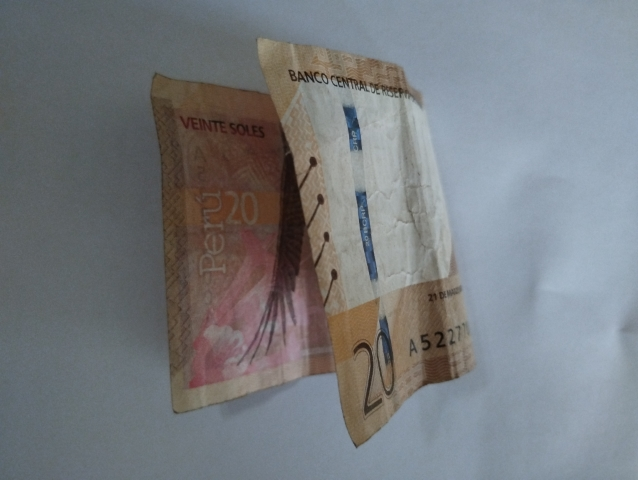

1/1 [==============================] - 0s 45ms/step
Billete nuevo de 100


In [ ]:
image = cv2.imread('/content/drive/MyDrive/Tesis/Images/testing_set/test_20_new_020.jpg')
cv2_imshow(image)

#image.shape

image = cv2.resize(image, (64, 64))
#cv2_imshow(image)

#image

image = image / 255
#image

#image.shape

image = image.reshape(-1,64,64,3)

#image.shape

result = network.predict(image)
result

result = np.argmax(result)
result

#val_dataset.class_indices

if result == 0:
  print ('Billete nuevo de 100')
elif result == 1:
  print ('Billete antiguo de 100')
elif result == 2:
  print ("Billete nuevo de 10")
elif result == 3:
  print ("Billete anitiguo de 10")
elif result == 4:
  print ("Billete nuevo de 20")
elif result == 5:
  print ("Billete antiguo de 20")
elif result == 6:
  print ("Billete nuevo de 50")
elif result == 7:
  print ("Billete antiguo de 50")